# Prosjektoppgave SOK-1003

Det har i corona året 2020 vært mye oppbluss i sosiale medier om investeringer i aksjer, kryptovaluta og fondsparing. Dette gjorde at vi ble nysgjerrig og gikk nærmere inn på tematikken rundt aksjemarkedet. Fra SSB har vi sett på tall, som blant annet viser forskjellen mellom antall kvinner og menn som har investert i aksjer og syntes det hørtes interessant ut å framstille det grafisk, og samtidig se på forskjellen i utbytte på både menn og kvinner.  



I en artikkel fra Aftenposten fant vi ytterligere informasjon, om skjevfordelingen på inntektsstigen. Aftenposten presenterte blant annet at samlet aksjeutbytte nesten doblet seg fra 2014 til 2015. "Den store veksten i utbyttet i 2015 skyldes trolig at utbytteskatten ble satt opp fra 2016. Mange har derfor fremskyndet uttaket av utbytte til 2015", sier seniorrådgiver Jon Epland i SSB. I tillegg, var skjevfordelingen av aksjeutbytte enorm. 70% av uttbyttekronene gikk til de 1% rikeste, og 90% av utbyttekronene gikk til de 5% rikeste. Bjørnestad skriver også at "Med unntak av de tre årene 2003–2005 var inntektsfordelingen i 2015 den skjeveste i en tallrekke tilbake til 1992. I disse tre årene var utbyttene historisk høye fordi det var varslet økt skatt på utbytte fra 2006." (Bjørnestad, 2016)

Vi ønsket å lage vår egen vri på prosjektet for å gjøre oppgaven mer interessant og tenkte videre at vi kunne se på hvordan økonomien innenfor aksjemarkedet, kan påvirkes av de politiske partiene som sitter i regjeringen. Vi måtte vurdere hvilke årstall vi skulle ha med i beregningen, SSB gjorde dette enkelt for oss ettersom tabellen vi brukte, kun hadde tall fra 2006 til 2020. Ved å hente inn tall fra 2006, vil vi kunne framstille et plot og se endringer grafisk fra Arbeiderpartiregjeringen som vi hadde i 2005 til 2013, etterfulgt av Høyreregjeringen 2013 til 2021. 

Vi ønsker å finne ut om det har vært en økning i antall personer som eier aksjer ved Høyreregjeringen, sammenlignet med den tidligere AP regjeringen, om det har vært et større aksjeutbytte etter regjeringsskiftet og om hvem som har mottatt størst utbytte gjennomsnittlig, av menn og kvinner i perioden 2006 til 2020.

For å løse denne oppgaven, brukte vi virkemidler som Google, "YouTube tutorials" og "cheat sheets". Vi startet med å laste inn tallene fra SSB, ved å kopiere API-spørringen fra SSB sin nettside. Så kom første problem, å finne ut hvordan man lager en Pandas DataFrame fra json API-spørring. YouTube ble tidlig tastet inn i søkemotoren, og vi fant noen gode videoer som ga oss informasjonen vi trengte for å komme i gang med oppgaven. Når det kommer til selve kodingen, måtte vi prøve og feile en god del. For å skaffe oversikt over funksjonene i pakkene, var "cheat sheets" en verdsatt hjelpende hånd. Hver gang vi lærte noe nytt eller fant en ny fremgangsmåte, gikk vi tilbake i koden og gjorde de endringene som var nødvendige.

Vi starter med å importere de pakkene vi trenger til koden.

In [2]:
import pandas as pd
from pyjstat import pyjstat
import requests
import matplotlib.pyplot as plt

Så importerer vi dataene våre fra SSB ved bruk av SSBs API-spørring.

In [3]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/06959/'

payload = {
  "query": [
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "0",
          "1",
          "2"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Aksjonaer",
          "Utbytte"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

resultat = requests.post(POST_URL, json = payload)

dataset = pyjstat.Dataset.read(resultat.text)
df = dataset.write('dataframe')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kjønn               90 non-null     object
 1   statistikkvariabel  90 non-null     object
 2   år                  90 non-null     object
 3   value               90 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ KB


Vi ser at variabelen 'år' er et object, men vi ønsker å ha den som integer, så vi konverterer den til først til string, så til integer.

In [4]:
df['år'] = df['år'].astype(str).astype(int)
df

,kjønn,statistikkvariabel,år,value
0,Begge kjønn,Personer som eide aksjer 31.12 (antall),2006,587780
1,Begge kjønn,Personer som eide aksjer 31.12 (antall),2007,601879
2,Begge kjønn,Personer som eide aksjer 31.12 (antall),2008,617501
3,Begge kjønn,Personer som eide aksjer 31.12 (antall),2009,615541
4,Begge kjønn,Personer som eide aksjer 31.12 (antall),2010,625055
...,...,...,...,...
85,Kvinner,Mottatt utbytte (mill. kr),2016,10528
86,Kvinner,Mottatt utbytte (mill. kr),2017,10247
87,Kvinner,Mottatt utbytte (mill. kr),2018,11392
88,Kvinner,Mottatt utbytte (mill. kr),2019,11627


Vi får ikke sett hele tabellen, så vi søker på Google og finner ut at vi kan bruke `pd.set_option` for å få sett alle tallene. 

In [5]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df

,kjønn,statistikkvariabel,år,value
0,Begge kjønn,Personer som eide aksjer 31.12 (antall),2006,587780
1,Begge kjønn,Personer som eide aksjer 31.12 (antall),2007,601879
2,Begge kjønn,Personer som eide aksjer 31.12 (antall),2008,617501
3,Begge kjønn,Personer som eide aksjer 31.12 (antall),2009,615541
4,Begge kjønn,Personer som eide aksjer 31.12 (antall),2010,625055
5,Begge kjønn,Personer som eide aksjer 31.12 (antall),2011,622475
6,Begge kjønn,Personer som eide aksjer 31.12 (antall),2012,630634
7,Begge kjønn,Personer som eide aksjer 31.12 (antall),2013,632177
8,Begge kjønn,Personer som eide aksjer 31.12 (antall),2014,632939
9,Begge kjønn,Personer som eide aksjer 31.12 (antall),2015,642875


Vi ser at tabellen er rotete. Derfor bestemmer vi oss for å dele opp datasettet.

Vi startet med å lage to tomme lister, en for år og en for verdien. Så lager vi en for-loop som legger inn de riktige årstallene og verdiene i listene. Deretter lager vi en dictionary av de to listene og gjør det om til en Pandas DataFrame.

In [6]:
# Antall aksjeeiere (Begge kjønn)
begge_antall_år=[]
begge_antall_verdi=[]
for index, (kjønn, statistikkvariabel, år, value) in df.iterrows():
    if (kjønn == 'Begge kjønn' and statistikkvariabel == 'Personer som eide aksjer 31.12 (antall)'):
        begge_antall_år.append(år)
        begge_antall_verdi.append(value)
begge_antall={'år': begge_antall_år, 'value': begge_antall_verdi}
begge_antall_df=pd.DataFrame(begge_antall)

In [7]:
# Mottatt aksjeutbytte (Begge kjønn)
begge_utbytte_år=[]
begge_utbytte_verdi=[]
for index, (kjønn, statistikkvariabel, år, value) in df.iterrows():
    if (kjønn == 'Begge kjønn' and statistikkvariabel == 'Mottatt utbytte (mill. kr)'):
        begge_utbytte_år.append(år)
        begge_utbytte_verdi.append(value)
begge_utbytte={'år': begge_utbytte_år, 'value': begge_utbytte_verdi}
begge_utbytte_df=pd.DataFrame(begge_utbytte)

In [8]:
# Antall menn som eier aksjer
menn_antall_år=[]
menn_antall_verdi=[]
for index, (kjønn, statistikkvariabel, år, value) in df.iterrows():
    if (kjønn == 'Menn' and statistikkvariabel == 'Personer som eide aksjer 31.12 (antall)'):
        menn_antall_år.append(år)
        menn_antall_verdi.append(value)
menn_antall={'år': menn_antall_år, 'value': menn_antall_verdi}
menn_antall_df=pd.DataFrame(menn_antall)


In [9]:
# Mottatt aksjeutbytte for menn
menn_utbytte_år=[]
menn_utbytte_verdi=[]
for index, (kjønn, statistikkvariabel, år, value) in df.iterrows():
    if (kjønn == 'Menn' and statistikkvariabel == 'Mottatt utbytte (mill. kr)'):
        menn_utbytte_år.append(år)
        menn_utbytte_verdi.append(value)
menn_utbytte={'år': menn_utbytte_år, 'value': menn_utbytte_verdi}
menn_utbytte_df=pd.DataFrame(menn_utbytte)


In [10]:
# Antall kvinner som eier aksjer
kvinner_antall_år=[]
kvinner_antall_verdi=[]
for index, (kjønn, statistikkvariabel, år, value) in df.iterrows():
    if (kjønn == 'Kvinner' and statistikkvariabel == 'Personer som eide aksjer 31.12 (antall)'):
        kvinner_antall_år.append(år)
        kvinner_antall_verdi.append(value)
kvinner_antall={'år': kvinner_antall_år, 'value': kvinner_antall_verdi}
kvinner_antall_df=pd.DataFrame(kvinner_antall)


In [11]:
# Mottatt aksjeutbytte for kvinner
kvinner_utbytte_år=[]
kvinner_utbytte_verdi=[]
for index, (kjønn, statistikkvariabel, år, value) in df.iterrows():
    if (kjønn == 'Kvinner' and statistikkvariabel == 'Mottatt utbytte (mill. kr)'):
        kvinner_utbytte_år.append(år)
        kvinner_utbytte_verdi.append(value)
kvinner_utbytte={'år': kvinner_utbytte_år, 'value': kvinner_utbytte_verdi}
kvinner_utbytte_df=pd.DataFrame(kvinner_utbytte)

Så bruker vi matplotlib til å plotte tallene våre for antall aksjeeiere av begge kjønn. Nå kan vi se hvordan antall aksjeeiere har endret seg fra år til år. Vi legger inn en vertikal linje når x=2013.8 fordi vi vil se regjeringsskiftet som var i oktober 2013 på figuren. 

In [15]:
begge_antall_df

,år,value
0,2006,587780
1,2007,601879
2,2008,617501
3,2009,615541
4,2010,625055
5,2011,622475
6,2012,630634
7,2013,632177
8,2014,632939
9,2015,642875


Text(0, 0.5, 'Antall aksjeeiere (begge kjønn)')

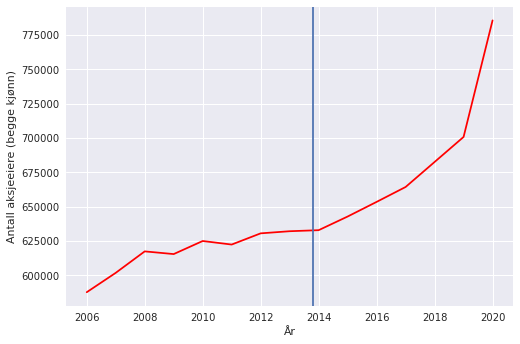

In [12]:
plt.style.use('seaborn')
ax = plt.plot(begge_antall_df['år'], begge_antall_df['value'], color='red')
plt.axvline(x=2013.8)
plt.xlabel('År')
plt.ylabel('Antall aksjeeiere (begge kjønn)')


Fig.1: Denne grafen viser antall aksjeeiere av begge kjønn. På x-aksen har vi årene fra 2006 til 2020. I 2006 var antallet ca. 590 000 personer. Ved slutten av APs regjeringsperiode var det ca. 630 000. Dette tilsvarer en omtrentlig økning på **40 000 personer**. Som nevnt tidligere viser den vertikale linjen regjeringsskiftet i oktober 2013. Etter regjeringsskiftet ser vi en mye tydeligere økning. Under Høyres regjering økte antall aksjeeiere til ca. 785 000. Økningen under Høyres regjeringsperiode tilsvarer **ca 150 000 nye aksjeeiere**.

Vi ser da at det var større økning i antall aksjeeiere under Høyres regjeringsperiode enn APs.

Deretter plotter vi tallene for det totale aksjeutbyttet for å se endringen fra år til år. Også her legger vi til en vertikal linje for regjeringsskiftet.

In [14]:
begge_utbytte_df

,år,value
0,2006,6572
1,2007,15925
2,2008,23396
3,2009,23008
4,2010,27959
5,2011,30195
6,2012,32805
7,2013,35802
8,2014,40062
9,2015,80771


Text(0, 0.5, 'Mottatt aksjeutbytte for begge kjønn \n (Mill kr)')

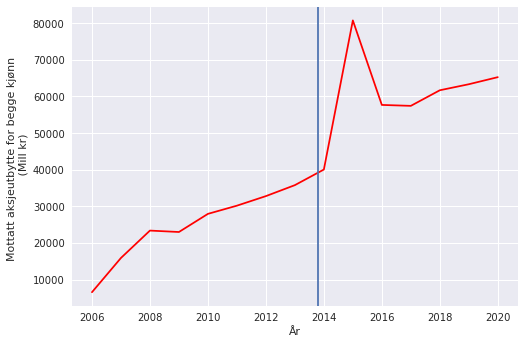

In [16]:
bx = plt.plot(begge_utbytte_df['år'], begge_utbytte_df['value'], color='red')
plt.axvline(x=2013.8)
plt.xlabel('År')
plt.ylabel('Mottatt aksjeutbytte for begge kjønn \n (Mill kr)')

Fig. 2: Denne grafen viser mottatt aksjeutbytte for begge kjønn, vist i millioner kroner. På x-aksen har vi årene fra 2006 til 2020. I 2006 lå mottatt aksjeutbytte på ca. 6,5 milliarder kroner. Ved slutten av APs regjeringsperiode hadde dette økt til ca. 40 milliarder kroner. Dette tilsvarer en omtrentlig økning på **33,5 milliarder kroner**. Vi kan se på grafen at aksjeutbyttet hadde en relativt stabil økning fram til 2015 da aksjeutbyttet doblet seg. Epland refererer, i Aftenposten, til framskyndet uttak av utbytte grunnet økt utbytteskatt i 2016, som grunnen for denne økningen. Dette kan vi se stemmer overens med grafen. Etter regjeringsskiftet ser vi en betydelig økning i 2015, men som går tilbake til den normale, progressive økningen som vi ser i de forekommende år. Hvis vi ser bort i fra det spesielle året 2015, ser vi i løpet av Høyres regjeringsperiode at mottatt aksjeutbytte økte fra 40 milliarder kroner til 65 milliarder kroner. Økningen under Høyres regjeringsperiode tilsvarer ca **25 milliarder kroner** i aksjeutbytte.

Hvis vi ser bort i fra den enorme økningen i 2015, så er det mest interresante med dette plottet at vi ser en større økning i aksjeutbytte under APs regjeringsperiode enn Høyres. 

Så ville vi se på det gjennomsnittlige aksjeutbyttet for menn og kvinner. For å finne gjennomsnittlig aksjeutbytte deler vi mottatt aksjeutbytte for menn på antall menn. Deretter ganger vi med 1 million for å få tallene i kroner.  

In [18]:
menn_gjennomsnitt= menn_utbytte_df['value']/menn_antall_df['value']*1000000
menn_gjennomsnitt

0      12860.515370
1      31511.220943
2      45721.095866
3      44969.780612
4      53896.850154
5      58288.581119
6      62551.155177
7      67748.827068
8      75426.880363
9     150431.814527
10    104821.649200
11    102748.926184
12    106498.817762
13    106522.903279
14     97333.199339
Name: value, dtype: float64

Så gjør vi det samme for å finne gjennomsnittlig aksjeutbytte for kvinner.

In [19]:
kvinner_gjennomsnitt= kvinner_utbytte_df['value']/kvinner_antall_df['value']*1000000
kvinner_gjennomsnitt

0      7595.274289
1     15802.252299
2     20972.974079
3     21036.352743
4     25064.801067
5     27526.968648
6     29436.107095
7     32632.157490
8     36983.448317
9     71288.102262
10    51729.305575
11    49976.589477
12    54200.903031
13    54004.969925
14    50372.328152
Name: value, dtype: float64

For å plotte gjennomsnittlig aksjeutbytte for menn og for kvinner i samme figur, lager vi et nytt datasett. Datasettet består av årstall og gjennomsnittlig akjeutbytte for menn og kvinner.

In [20]:
gjennomsnitt={'år': menn_antall_år,
              'gjennomsnitt menn': menn_gjennomsnitt,
              'gjennomsnitt kvinner': kvinner_gjennomsnitt}
gjennomsnitt_df = pd.DataFrame(gjennomsnitt)
gjennomsnitt_df

,år,gjennomsnitt menn,gjennomsnitt kvinner
0,2006,12860.515370,7595.274289
1,2007,31511.220943,15802.252299
2,2008,45721.095866,20972.974079
3,2009,44969.780612,21036.352743
4,2010,53896.850154,25064.801067
5,2011,58288.581119,27526.968648
6,2012,62551.155177,29436.107095
7,2013,67748.827068,32632.157490
8,2014,75426.880363,36983.448317
9,2015,150431.814527,71288.102262


Nå kan vi plotte tallene for gjennomsnittlig aksjeutbytte i en figur.

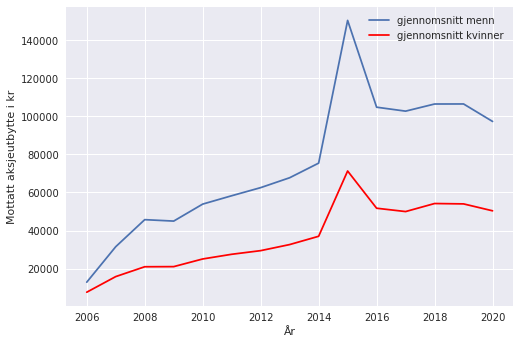

In [21]:
ax = plt.gca()

gjennomsnitt_df.plot(kind='line',x='år',y='gjennomsnitt menn',ax=ax)
gjennomsnitt_df.plot(kind='line',x='år',y='gjennomsnitt kvinner', color='red', ax=ax)
plt.xlabel('År')
plt.ylabel('Mottatt aksjeutbytte i kr')
plt.show()

Fig. 3: Denne grafen viser gjennomsnittlig aksjeutbytte i kroner for menn og kvinner. Den blå grafen viser gjennomsnittlig aksjeutbytte for menn, den røde viser for kvinner.

Vi ser at det er tydelig forskjell mellom gjennomsnittlig aksjeutbytte for menn og kvinner. Gjennomsnittet for menn er alltid høyere enn gjennomsnittet for kvinner. I tillegg ser det ut som økningnen hos menn generelt sett er raskere enn hos kvinner, men årene etter 2016 er ganske jevne. Som Bjørnstad skriver om skjevfordeling i Aftenposten, er grunnen til at menn sin graf er høyere opp enn kvinnenes, at et fåtall menn trekker opp gjennomsnittet betydelig.

Vi ser altså at menn, historisk sett, har mottatt et større gjennomsnittlig aksjeutbytte enn kvinner i perioden 2006-2020.

Vi ønsket å se på om det har vært en økning i antall personer som eier aksjer ved Høyre-regjeringen, sammenlignet med Ap-regjeringen. I Fig. 1, ser vi at det var større økning i antall aksjeeiere under Høyres regjeringsperiode, enn APs. Vi ønsket også å finne ut om det har vært et større gjennomsnittlig aksjeutbytte med Høyre i regjering enn med Ap i regjering. Som vi skrev tidligere, utelukker vi det spesielle året 2015, og vi ser da, på Fig. 2, en større økning i aksjeutbytte under APs regjeringsperiode enn Høyres. Til slutt ønsket vi å se på hvem som har mottatt størst utbytte gjennomsnittlig av kvinner og menn i perioden 2006 til 2020. I Fig. 3, kan vi se at menn har mottatt et større gjennomsnittlig aksjeutbytte enn kvinner i perioden.

Da vi begynte med prosjektet, hadde vi noen tanker om hva resultatene ville bli. Det som overrasket oss mest var at det har vært en større økning, år for år, i aksjeutbytte under APs regjeringsperiode, enn under Høyres. Det er klart at man kan reflektere rundt hva som er årsaken til dette og det kunne vært interresant å undersøke videre i fremtiden. 

Kilder:
Bjørnestad S. (2016, 29. desember). "Aksjeinntektene økte mer enn samlet lønn", <em>Aftenposten.</em> Hentet 30. november 2021 fra https://www.aftenposten.no/okonomi/i/5K5o1/aksjeinntektene-oekte-mer-enn-samlet-loenn